## 실습 
전처리-EDA-결정나무까지. 직접해보기
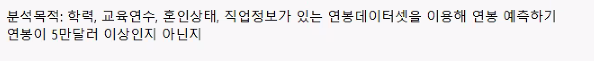
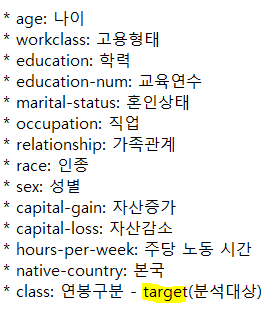
직접 해본 다음에는 배깅(결정나무와 다른개념)을 배울 예정

In [32]:
# 0. 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [102]:
pip install scikit-learn!

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.2 MB 6.7 MB/s eta 0:00:02
   ------------------------------ --------- 8.4/11.2 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 21.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
# 모델 학습
from sklearn.model_selection import train_test_split
# 결정나무
from sklearn.tree import DecisionTreeClassifier
# 평가 지표
from sklearn.metrics import accuracy_score,classification_report

In [2]:
#1. 데이터로딩
data = pd.read_csv("./data/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## flow
0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
    - 헤드, 평균값, 중앙값 보면서 
    - 데이터타입이 이상한건 없는지
    - 수치형 중에 평균값과 중앙값 차이가 얼마나 나는지.
2. 데이터 전처리(2.1. 결측값처리, 2.2. 이상값탐지)
    - 결측값% 구하기 isna()
    - 비율크면 drop('지울컬럼',axis=1)
- 결측 비율이 약7%이고 삭제후 데이터분포에 편향을 주지않음
    - workclass 컬럼결측과 occupation결측
- 수치
    - fillna(해당컬럼 평균값)
- 범주
    - fillna(가장 빈도가 높은 값)
- 마친후 info로 결측없는지 체크<br>
2.2. 이상값 탐지
- plt.plot(kind='box')(전체컬럼 중 이상값 찾기)
    - data['컬럼'].describe()와 .value_counts()으로 진짜이상값인지 생각해보기.
    - 이상값 범위구하기 IQR이용 (describe에서 인덱싱)
    - 범위 벗어난 자료를 필터링 (클래스별로 Fare의 describe를 각각 구함)
    - 이상값 원인 파악
3. EDA - 탐색적 데이터분석: 각 컬럼의 데이터분포, 그래프로 확인,<br> 문자는 숫자로, 상관관계 확인
    - 범주형과 수치형 분리하여서 각각 담기
    - 컬럼들 구성을 파악하고 plot() 으로 그래프 보기
    - 그래도 파악이안되면(나이,가족) 히스토그램으로 구간차이가 드러나게 시각화.
4. Feature Enginnering( 변수 선택, 새로운 특성 생성, 카테고리 변수의 더미 변수화(one-hot encoding)
    - pd.cut 함수로 기존 컬럼에 숫자->글자(10대) 남기기*     
    - groupby연산으로 컬럼간 연관성 파악<br> 이때 평균(생존율) 때에 따라 적용.    
    - 불필요한 컬럼 drop
    - 남은 컬럼 one-hot인코딩 하고 다음단계로.

5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
    - X는 문제 y는 답
    - X에 들어가야할 df에는 문제(생존)컬럼만 빠짐.
    - y는 생존 (one-hot인코딩상태) 

6. 홀드아웃: sklearn의 train_test_split 통해서 train, test 세트로 분리
    - 분석 모델선택
![image.png](attachment:image.png)    
7. sklearn에서 DecisionTreeClassifier를 통해 모델 훈련
    - 데이터 셔플링을 할때 타겟이 차지하는 비율(해당칼럼안에서) 만큼 돌아갈수있게 지정해줘야함.stratify=y
8. test세트를 모델에 넣어서 예측값 생성 후 pred변수에 담기
9. accuracy_score(), classification_report()를 이용해 모델의 성능확인

**수많은 컬럼중에서 목적부합하는 변수들만 유지하는것**

In [3]:
#1. 전체 컬럼 수: 14
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [67]:
data['native-country'].describe()

count              47985
unique                41
top        United-States
freq               43832
Name: native-country, dtype: object

# 미국은보통 10~11년이 의무교육기간.

In [4]:
data.columns 
# 이중에4: 'education','education-num'.'marital-status','occupation'

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [5]:
# 교육연수
data['education-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [6]:
# 혼인 상태
data['marital-status'].describe() # 중앙값 안나오는이유
data['marital-status'].value_counts() # 혼인 상태도 다양해서.얘도 14개 유니크

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

#### 결혼 상태 (marital-status) 항목 번역

| 원본 데이터               | 한국어 번역                | 설명 |
|---------------------------|-----------------------------|------|
| `Married-civ-spouse`      | 기혼 - 민간 결혼           | 일반적인 법적인 결혼 상태 (부부가 함께 사는 경우) |
| `Never-married`           | 미혼                       | 한 번도 결혼한 적 없음 |
| `Divorced`                | 이혼                       | 결혼했다가 법적으로 이혼함 |
| `Separated`               | 별거                       | 결혼은 했지만 현재 배우자와 떨어져 지내는 중 |
| `Widowed`                 | 사별                       | 배우자가 사망하여 혼자 된 상태 |
| `Married-spouse-absent`  | 기혼 - 배우자 부재         | 결혼은 했지만 배우자가 집을 떠나 장기간 연락이 없는 경우 등 |
| `Married-AF-spouse`       | 기혼 - 군 복무 중인 배우자 | 군 복무 중인 배우자와 결혼한 상태 (AF = Armed Forces) |


In [7]:
# 직업
data['occupation'].describe() # 중앙값 안나오는이유
data['occupation'].value_counts() # 얘도 14개 유니크

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### 직업 (occupation) 항목 번역

| 원본 데이터            | 한국어 번역             | 설명 |
|------------------------|--------------------------|------|
| `Prof-specialty`       | 전문직                   | 교수, 과학자, 엔지니어, 의사 등 고등 교육을 요구하는 직업 |
| `Craft-repair`         | 기능공 및 수리공         | 목수, 전기공, 기계 수리공 등 기술 기반 수작업 |
| `Exec-managerial`      | 임원 및 관리자           | 기업의 관리자, 부장, 임원 등 |
| `Adm-clerical`         | 행정 및 사무직           | 사무보조, 데이터 입력, 비서 등 |
| `Sales`                | 영업직                   | 판매원, 매장 직원, 보험/부동산 판매 등 |
| `Other-service`        | 기타 서비스직            | 청소, 요리, 미용 등 기타 서비스 관련 직업 |
| `Machine-op-inspct`    | 기계 조작 및 검사직      | 생산 기계 조작, 공정 검사 등 |
| `Transport-moving`     | 운송 및 운전직           | 트럭 운전사, 배달원 등 운송 관련 직업 |
| `Handlers-cleaners`    | 물류 및 청소 담당        | 짐 나르기, 건물 청소 등 단순 작업 |
| `Farming-fishing`      | 농업 및 어업             | 농부, 어부 등 자연 자원 기반 직업 |
| `Tech-support`         | 기술 지원                | 컴퓨터, 네트워크 등 기술적 문제 해결 지원 |
| `Protective-serv`      | 보안/경비 관련           | 경찰, 소방관, 경비원 등 보호 서비스 관련 |
| `Priv-house-serv`      | 가사 서비스직            | 가정부, 육아 도우미 등 가정 내 서비스 |
| `Armed-Forces`         | 군인                     | 현역 군 복무 중인 사람 |


In [8]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

### 교육 수준 (education) 항목 번역

| 원본 데이터     | 한국어 번역        | 설명 |
|----------------|---------------------|------|
| `HS-grad`      | 고등학교 졸업       | 고등학교 학력 보유자 |
| `Some-college` | 대학교 중퇴 또는 재학 | 대학 졸업은 안 했지만 일정 학점 이수 |
| `Bachelors`    | 학사                | 대학교 졸업 (4년제) |
| `Masters`      | 석사                | 대학원 석사 졸업자 |
| `Assoc-voc`    | 전문대 졸업 (직업)  | 직업 교육 중심의 전문학사 (2~3년제) |
| `11th`         | 고등학교 2학년 수료 | 11학년, 고2 정도에 해당 |
| `Assoc-acdm`   | 전문대 졸업 (학문)  | 일반 학문 중심의 전문학사 |
| `10th`         | 고등학교 1학년 수료 | 10학년, 고1 정도에 해당 |
| `7th-8th`      | 중학교 1~2학년 수준 | 중학교 수준의 교육 |
| `Prof-school`  | 전문직 대학 졸업   | 의대, 법대 등 전문직 대학 졸업 |
| `9th`          | 중학교 3학년 수료   | 9학년, 중3 정도에 해당 |
| `12th`         | 고등학교 3학년 수료 | 고3까지 마쳤지만 졸업은 아님 |
| `Doctorate`    | 박사                | 박사 학위 소지자 |
| `5th-6th`      | 초등학교 고학년     | 5~6학년 수준 |
| `1st-4th`      | 초등학교 저학년     | 1~4학년 수준 |
| `Preschool`    | 유치원              | 정규 교육 시작 전 단계 |


# 중앙값은 못봤지만 결측값이 있는지 찍어봄


In [9]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [10]:
# 결측비율 확인 len쓰겠음
#len(data['workclass']) # 얘는 어차피 안쓸거긴한데..
len(data['occupation'])
#len(data['native-country'])


48842

In [104]:
data.isna().sum() / len(data) *100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
edu_times         0.000000
marry             0.000000
dtype: float64

In [11]:
# 직업의 결측률은 5퍼센트정도. 
2809/len(data['occupation'])*100

5.751197739650301

In [12]:
# 나머지 결측값있는 컬럼들도 문제되지는 않음.
2799/len(data['workclass'])*100

5.7307235575938735

# 이제 결측자리에 채울값 찾기
- 직업의 평균값? <br> 평균이되는직업을 찾아서 그걸로 대체
- 직업의 평균을 찾으려면?
- 직업은 범주형 이므로 가장 빈도가 높은 Prof-specialty가 대체값이 될것.

In [13]:
# 결측된 자리 index만 따로 담기
occu_na_idx=data[data['occupation'].isna()].index

In [14]:
data['occupation'].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [15]:
data['occupation']= data['occupation'].fillna(data['occupation'].mode()[0])

In [16]:
# 결측된 내용 없음(1)
data.loc[occu_na_idx] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [17]:
# isna 없는거 이렇게 찍으면 되나???
data['occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: occupation
Non-Null Count  Dtype 
--------------  ----- 
48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [18]:
# isna의 합이 0된점 확인
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

# 이상값 탐지하기


<Axes: >

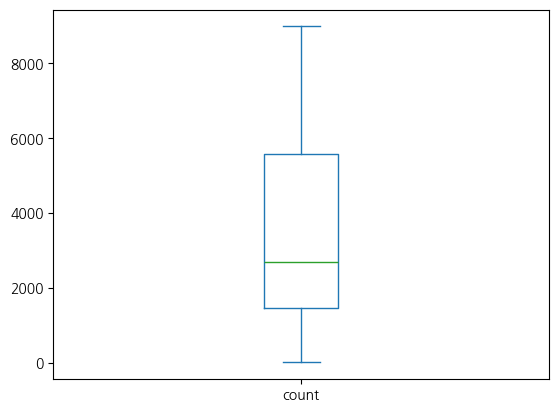

In [19]:
data['occupation'].value_counts().plot(kind='box')
# d0d 중앙값이 있긴하네??

<Axes: >

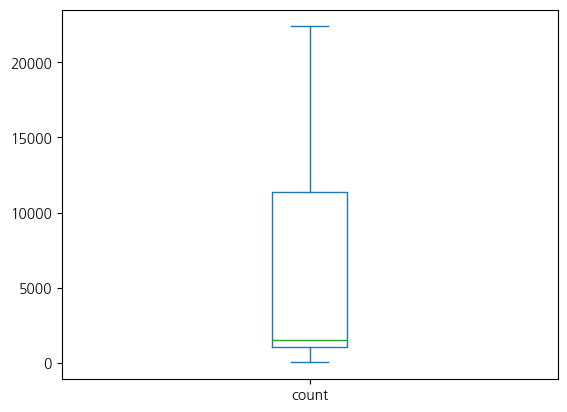

In [20]:
data['marital-status'].value_counts().plot(kind='box')
# d0d 중앙값이 계세요.

# ㅇ0ㅇ!!

<Axes: >

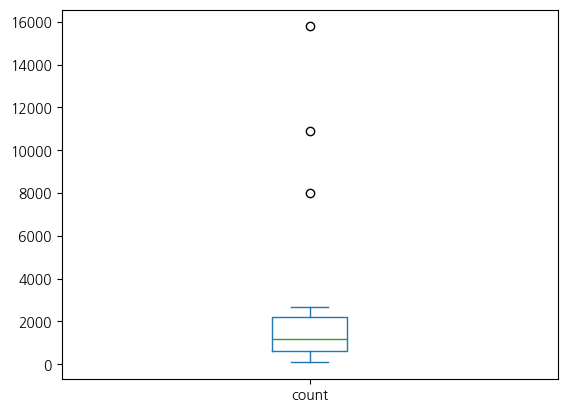

In [21]:
data['education-num'].value_counts().plot(kind='box')
# 교육연수에 갑자기 엄청 큰수가 있음 

<Axes: >

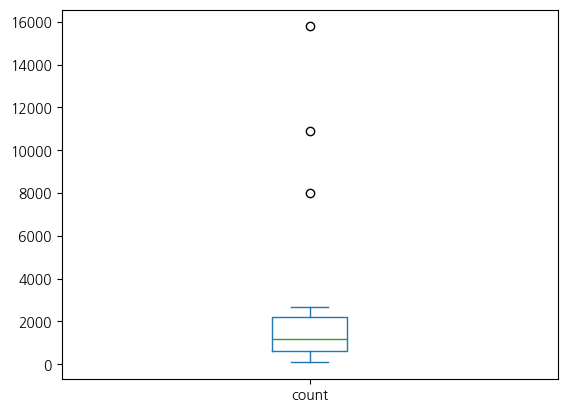

In [22]:
data['education'].value_counts().plot(kind='box')
# 학력에도에 갑자기 엄청 큰수가 있음 

# 이상값 범위부터 구하기

In [23]:
nedu_desc= data['education-num'].describe()
nedu_desc

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [24]:
maximum_nedu = nedu_desc.loc['75%'] + 1.5*(nedu_desc.loc['75%'] - nedu_desc.loc['75%'] )
maximum_nedu 

np.float64(12.0)

# 범위초과된 이상값들 모으기

In [31]:
outliers= data[data['education-num'] > maximum_nedu].sort_values(by='education-num',ascending=False)
outliers

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48820,71,NaN,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
16301,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
133,42,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,41,United-States,>50K
48813,34,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
126,48,Federal-gov,Doctorate,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,37,Private,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,<=50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
190,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,40,United-States,>50K
191,39,Private,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,>50K


## 남편들?이 왜 교육기간이 길었는가.
일단 학력과의 연관성을 먼저 살펴보겠음
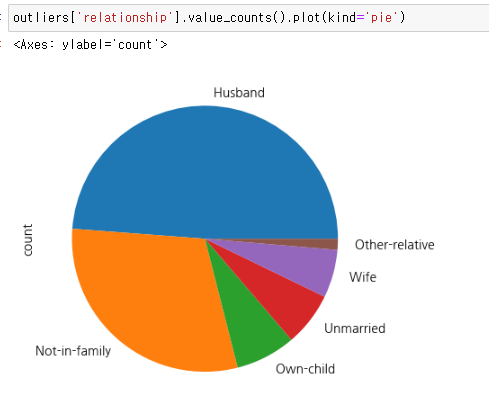

##### 관계 유형 (relationship) 항목 번역

| 원본 데이터       | 한국어 번역         | 설명 |
|------------------|----------------------|------|
| `Husband`        | 남편                 | 가구 내 가장이자 배우자 역할의 남성 |
| `Not-in-family`  | 가족 아님            | 혼자 거주하거나 하숙인, 친구 등 |
| `Own-child`      | 자녀                 | 자녀로서 등록된 가구 구성원 |
| `Unmarried`      | 미혼                 | 결혼하지 않았고 독립적인 상태 |
| `Wife`           | 아내                 | 가구 내 가장의 배우자인 여성 |
| `Other-relative` | 기타 친척            | 조부모, 삼촌, 사촌 등 기타 가족 |


In [30]:
data['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [46]:
data['edu_times']= pd.cut(data['education-num'],
       bins=[0,12,17], 
       labels=['under 12years','13~16'],
      right=False)

In [47]:
data[['edu_times','education']]

,edu_times,education
0,under 12years,11th
1,under 12years,HS-grad
2,13~16,Assoc-acdm
3,under 12years,Some-college
4,under 12years,Some-college
...,...,...
48837,13~16,Assoc-acdm
48838,under 12years,HS-grad
48839,under 12years,HS-grad
48840,under 12years,HS-grad


In [48]:
data[['edu_times','education']].describe()

,edu_times,education
count,48842,48842
unique,2,16
top,under 12years,HS-grad
freq,35131,15784


In [54]:
data[data['edu_times']=='13~16']

<Axes: ylabel='count'>

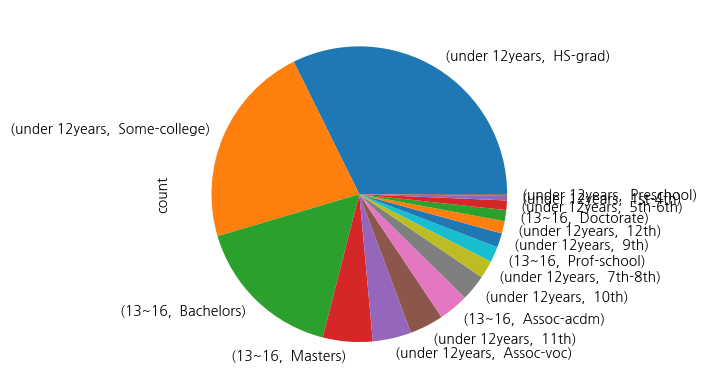

In [52]:
data[['edu_times','education']].value_counts().plot(kind='pie')

## nedu_max 는 12년 초과한 경우를 담음

In [73]:
# 직업이 무엇인지에 따라 교육기간과 소득이 달라질수있다고봄
# 지금 중요한건 기간이 12년 이상인 경우들이므로

nedu_max=data[data['edu_times']=='13~16']
nedu_max[['education','occupation']].describe()


,education,occupation
count,13711,13711
unique,5,14
top,Bachelors,Prof-specialty
freq,8025,5293


# prof-specialty는 전문직.
전문직을 준비하기위한 기간이 길지 않았나 판단됨.
# 따라서 이상값은 그대로 두기로?
16년정도는 무방하다고 보여짐 그대로 두기.<br>
다른 컬럼들 이상값 체크못했음

# 혼인상태를 one-hot으로 분류

# 범주와 수치를 분리하기.

In [74]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

## 싱글아님 not_s 따로 만들었으나

In [75]:
not_s=pd.get_dummies(data,columns=['marital-status'], drop_first=True)

In [87]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [105]:
data['marry']=data['marital-status'].astype('str')
data['marry'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

<Axes: ylabel='count'>

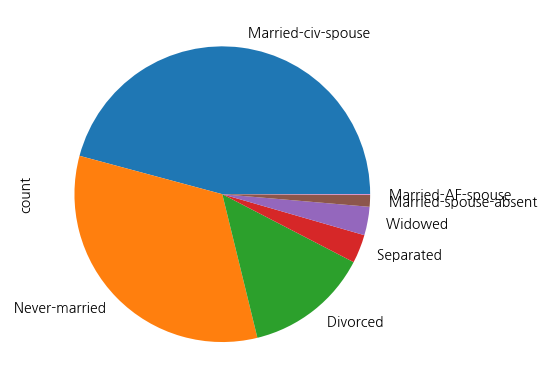

In [83]:
not_sg = data[data['marital-status']==' Married-civ-spouse']
data['marital-status']==''
data['marital-status']==''
data['marital-status']==''




In [112]:
data['race'].unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [113]:
data[data['native-country']==' South']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,edu_times,marry
377,24,Private,HS-grad,9,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,40,South,<=50K,under 12years,Never-married
746,30,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,Asian-Pac-Islander,Male,0,0,60,South,<=50K,under 12years,Married-civ-spouse
1303,21,Private,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,34,South,<=50K,under 12years,Never-married
1438,19,NaN,Some-college,10,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,2,South,<=50K,under 12years,Never-married
1875,28,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,50,South,>50K,13~16,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45769,36,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,0,0,70,South,<=50K,under 12years,Never-married
46628,39,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,South,<=50K,13~16,Married-civ-spouse
46814,50,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,60,South,<=50K,under 12years,Married-civ-spouse
47583,60,Private,Masters,14,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,50,South,>50K,13~16,Married-civ-spouse


In [ ]:
data.describe() # 여기에 class도 나올수 있게.
data['caplital_gain'].value_counts()
# 투자소득이 없는 경우가 많아서 IQR 계산도 어렵다
# 이상값 없다
# 근무시간, 투자소득이나 투자손해나 모두 이상값 없다



**풀이들으면서 대충필기**<br>
EDA 할때 범주형 카테고리형 분리하기
obj_cols=
num_cols= 따로 저장
하나씩 찍어보기 힘드니까 반복문 사용

data.select_dtypes(include='object') ex로만 바꾸면 됨

반복문에 변수명 하나씩 넣어서 내용물 찍어보도록

- 유니크가 컬럼마다 몇개인지 알려면


for col in obj_cols:
    print(obj_cols[col].value_counts())
    
학력 별 소득 5만이상을 가져오려면?

tatio_result=
X = pd.get_dummies(data_set1,drop_first=True)
y= data['class']

# 하이퍼파라미터튜닝 <br> 모델성능개선
지니지수(크리테리언) 분류 알고리즘이 하이퍼파라미터안에있음 깊이도 최종적으로 도달할때까지 질문을 던지는데 의사결정나무의 과적합을 피하기 위한 max_depth(깊이라고하는 질문 수 제한) ccp_alpha는 가지치기. 

In [119]:
for i in range(1,11): # 1부터 11까지
    dtc= DecisionTreeClassifier(max_depth=10, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("="*30, f"max_depth: {i}", "="*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

NameError: name 'X_train' is not defined

# 의사결정나무 시각화

In [34]:
from sklearn.tree import plot_tree

In [118]:
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, max_depth=3- 7 fontsize=15, filled=True)
plt.show()

NameError: name 'dtc' is not defined

<Figure size 2000x2000 with 0 Axes>

# 데이터 분석 모델의 성능평가

In [1]:
print(classification_report(y_test,pred))

NameError: name 'classification_report' is not defined

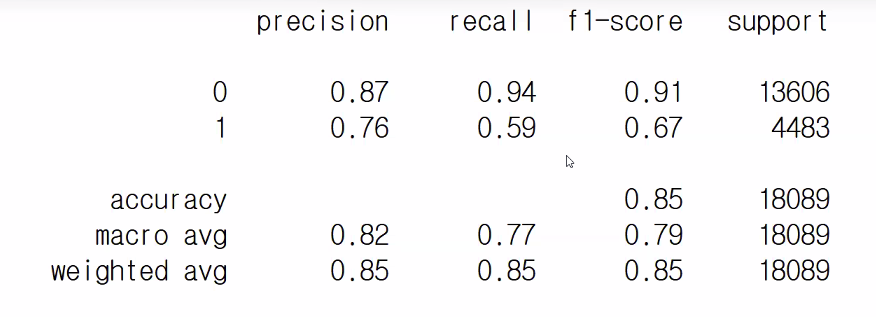
1. accuracy(정확도/정분류율): 1을 1로 0을 0으로 맞추는 비율
2. False Positive Rate(오분류율/오답률): 1을 0으로 예측 0을 1로 잘못 예측.
3. precision (정밀도): 예측한 것 중에서 실제로 맞은 것. 예측 positive 중에서 실제 positive인 비율
4. recall(민감도/재현율): 실제값을 실제값으로 잘 예측한 것. 실제 positive중 예측 positive가 맞은것
<br>**precision은 예측값을 잘찾고.<br> recall은 실제를 잘찾음 <br>두 값은 트레이드오프관계**
5. F1-Score: precision과 recall의 조화 평균이므로 이값이 높으면 
6. Specificity(특이도): 실제 negative중 예측에 성공한 비율
- 트레이드오프 관계
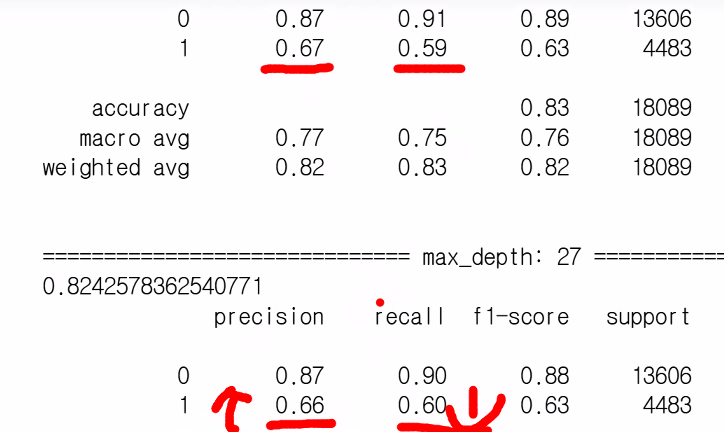

# confusion matrix(혼동행렬)

|               | **예측 Positive** | **예측 Negative** |
|:-------------:|:-----------------:|:-----------------:|
| **실제 Positive**  | **TP**<br>(True Positive)<br>→ 실제도 양성이고, 예측도 양성 | **FN**<br>(False Negative)<br>→ 실제는 양성인데, 예측은 음성 |
| **실제 Negative**  | **FP**<br>(False Positive)<br>→ 실제는 음성인데, 예측은 양성 | **TN**<br>(True Negative)<br>→ 실제도 음성이고, 예측도 음성 |

---

### 🧠 용어 풀이

- **TP (True Positive)**: 맞게 **양성**이라고 예측함  
- **FN (False Negative)**: **양성인데 놓침** (예측을 틀림)  
- **FP (False Positive)**: **음성인데 잘못 예측함**  
- **TN (True Negative)**: 맞게 **음성**이라고 예측함  


예측: 의사결정나무의 결과를 담은 pred가 예측<br>
실제: 실제데이터
- TP: 실제와 예측 모두 Positive <br> 연봉 5만초과자를 예측하고 실제로도 연봉 5만이 안됨.
- TN: 실제와 예측 모두 Negative <br> 연봉5만이 안된다는 예측과 실제로도 연봉 5만이 안되는 것이 확인.
- FP(1형 오류): 예측 Positive - 실제 Negative<br> 5만이된다- 안되네
- FN(2형 오류): 예측 Negative - 실제 Positive<br> 안된다 - 되네

    
#### 정확도 (accuracy) 계산하기
정확도는 무엇의 평균인가:  $ TP + TN \over TP+TN+FP+FN $
#### 오분류율 (FPR)
정확도와 반대되는개념: $ FP+FN \over TP+TN+FP+FN $
#### 정밀도(precision)
예측 잘한것과 못한것 나눈것 : $ TP \over TP+FP $
#### 재현율/민감도 ( recll )
실제 값 중 Positive가 중요함: $ TP \over TP+FN $
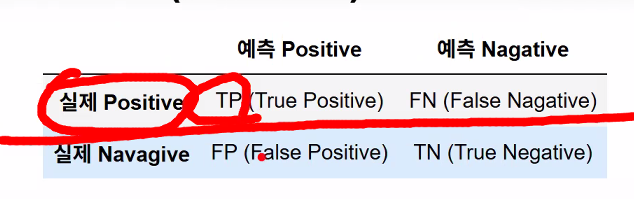
#### 특이도 (Specificity)
$ TN \over FP+TN $
#### F1-score
- precision과 재현율 <br>
* F1-score: $  2 \cdot {Precision \cdot Recall \over Precision + Recall} $   

In [33]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred,display_labels=[0,1]))

#### F1점수만 볼게아니라 다른값도 체크해야하는이유.
recall 값이 높은 모델을 선택해야하는 경우도 있기 때문.<br>
침입예측, 암진단예측이P 일때<br>
암인줄 알았는데 ( 예측 ) <br>
실제는 암이 아닌 경우 FP <br>
recall값은 암이 아닌걸 맞추는 격.

# Dataset2: 모든 컬럼을 넣어 분석해보기.
- 불필요해보이는 컬럼을 drop했는데 정확도가 낮아짐
- 사람이 알아낼 수 없는 영역을 감안하도록 머신러닝을 진행하는것.
- 그래도 EDA는 빡세게 해야한다. 모델을 튜닝할때 필요함.
- **드롭하지 않고 모든 컬럼을 분석해보는 방법**
- 분석알고리즘도 여러가지로 돌려서 비교해본다고.
- 데이터 특성에 따라 결과가 잘나오는 경우있음 <br>디시젼트리에서 파생된 알고리즘들 : XG부스터, LGBM, Cat부스터 능사는 아님 다른 알고리즘 로지스틱 회귀를 사용하는게 결과가 더빠르기도하다
- 스케일러도 여러가지로 사용하고 다적용해서 데이터셋을 여러개 만들어 쓰게됨
- 경우의 수는 계속늘어난다.
max_depth가 1일때 criterion도 바뀌니까
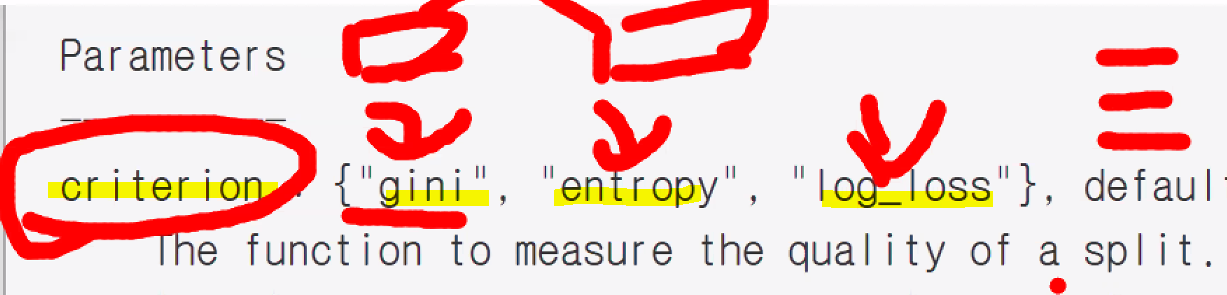
- 결과를 보고 판단을 해야한다. 자신을 믿지 말것.

# EDA를 더 쉽게
- ydata 라이브러리 사용

In [52]:
#1. 데이터로딩부터 다시
data2 = pd.read_csv("./data/salary2.csv")
data2.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


설치
https://github.com/ydataai/ydata-profiling
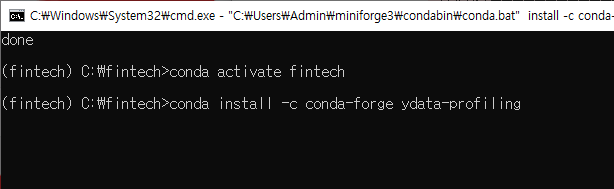

In [14]:
from ydata_profiling import ProfileReport

In [18]:
profile = ProfileReport(data2, title="Profiling Report")

In [19]:
profile.to_file("salary2_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 13.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

완료 후 
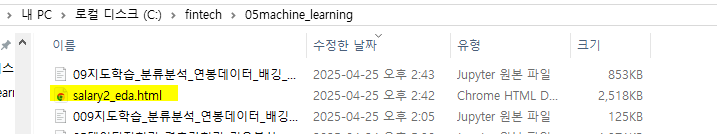
웹브라우저 기반으로 제공되는 서비스라서 <br>데이터셋이 메모리 통해 처리가 어려울 정도가 되면 멈춰버림.
<br>
- ydata결과를 통해 데이터 전처리

In [20]:
data2 = data2.dropna() # 결측없앤 걸로 재할당
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
data2[data2.duplicated()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
595,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
653,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
741,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
864,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1131,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
48793,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
48808,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [24]:
data2= data2.drop_duplicates() # 중복제거 재할당

In [25]:
# 드롭할 컬럼명 찾기
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [27]:
# 연관도가 높은 두컬럼 드롭
data2=data2.drop(["education","relationship"], axis=1) 
data2

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,>50K
48836,22,Private,10,Never-married,Protective-serv,White,Male,0,0,40,United-States,<=50K
48837,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
48839,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [28]:
data2=data2.reset_index(drop=True)
data2

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,>50K
39236,22,Private,10,Never-married,Protective-serv,White,Male,0,0,40,United-States,<=50K
39237,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
39238,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [30]:
# 더미 추가된 데이터프레임 만들기
X3 = pd.get_dummies(data2, drop_first=True)
y3 = X3['class_ >50K']
X3 = X3.drop("class_ >50K", axis=1)

# 0425:15:20분 전후

In [43]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.4,stratify=3,random_state=10)

InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got 3 instead.

In [37]:
# 반복문 틀
dtc3 = DecisionTreeClassifier(random_state=10)
dtc3.fit(X3_train,y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696



In [38]:
# 맥스뎁스 바꿀 반복문
for i in range(1,31):    
    dtc3 = DecisionTreeClassifier(random_state=10)
    dtc3.fit(X3_train,y3_train)
    pred3 = dtc3.predict(X3_test)

# 구분선 만들어 주기
    print("="*30,f"max_depth:{i}","="*30)
    
    print(accuracy_score(y3_test,pred3))
    print(classification_report(y3_test,pred3))
    
    
# 돌려본 후 정확도(accuracy_score) 등 최적의 depth를 가져오기

============================== max_depth:1 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:2 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:3 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False

============================== max_depth:21 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:22 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

============================== max_depth:23 ==============================
0.7947884811416922
              precision    recall  f1-score   support

       Fa

In [ ]:
# 최적의 depth값 주기
dtc3 = DecisionTreeClassifier(random_state=10, max_depth=8)
dtc3.fit(X3_train,y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

# 이부분 다시 들어봐야함

In [39]:
#어떤 모델 쓸지 최종결정

print(classification_report(y_test,pred))
# precision(예측)이 중요할때 좋은 모델
print(classification_report(y3_test,pred3))
# recall(실제)가 중요할때 좋은 모델


              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696

              precision    recall  f1-score   support

       False       0.86      0.86      0.86     11699
        True       0.60      0.60      0.60      3997

    accuracy                           0.79     15696
   macro avg       0.73      0.73      0.73     15696
weighted avg       0.80      0.79      0.80     15696



이상 데이터 분석 모델을 필요에 맞게 만들어봤음
# 배깅
- 의사결정나무의 성능 향상
- 의사결정나무 하나로 예측하게 되고 조건의 영향이 심함
- Bootstrap Aggregating의 줄임말
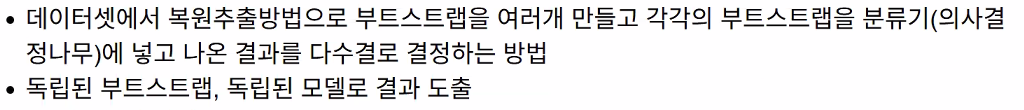
- Bootstrap은 데이터 샘플<br> 원래 데이터가 8개 있으면 복원추출 진행
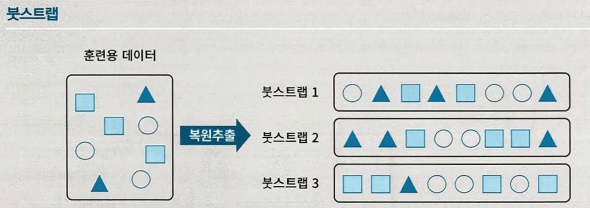

다수결로 최종 데이터 모델이 선정됨
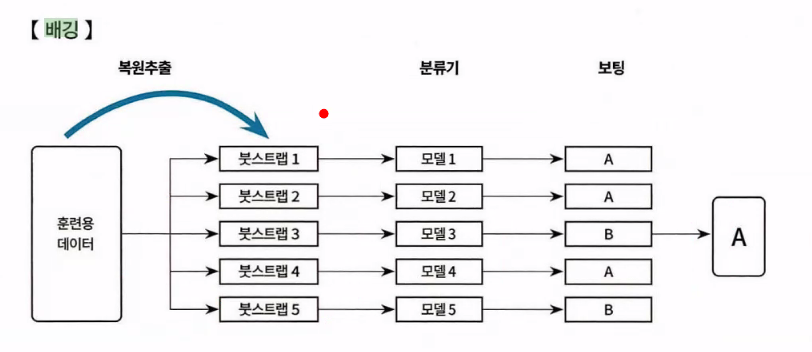

## 부스팅
- 배깅처럼 여러 모형을 만듦 <br> 배깅과 달리 독립적이지 않음
- 붓스트랩으로 만든 모델로 분석 후 오답만 모아서 <br> 재학습 재분류 향상된 모델을 다시 만드는..
- max_depth는 1
- 점진적으로 성능이 향상되는 알고리즘
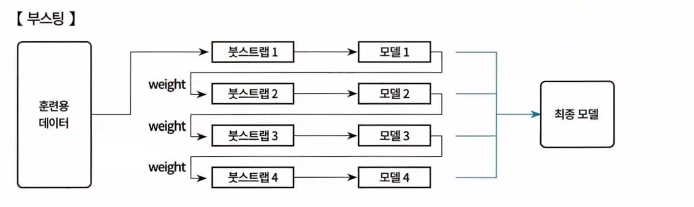
- 외부패키지<br> 빠른 XGBoost, Light GBM <br> 느린 Gradient AdaBoosting
- AdaBoostClassifier
    - 하이퍼파라미터만 바꿔주면 다양한 앙상블 사용가능 엄청 길다는 점... https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

## 랜덤포레스트 (=랜덤배깅)
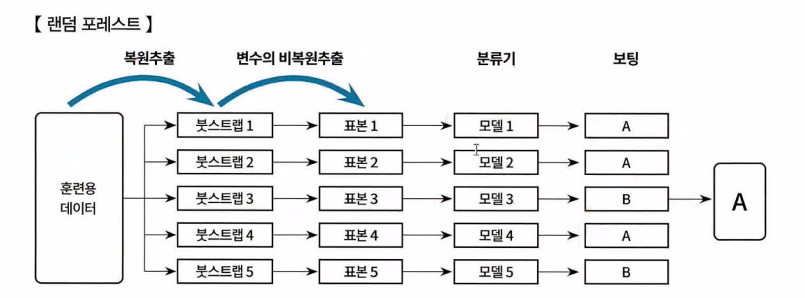
- 독립적 붓스트랩 까지는 배깅과 비슷.
- 독립성이 향상 : 비복원 추출을 진행한다는점이 다름. 비복원은 한번뽑은게 복원되지 않음 
- 나머지는 똑같음
- sklearn.ensemble

## 세가지 모델을 돌려서 사용.

# 배깅, 부스팅, 랜덤배깅 실습

In [40]:
# 사이킷런에 구현되어있음
from sklearn.ensemble import BaggingClassifier

In [41]:
# 배깅'
bc = BaggingClassifier(n_estimators=10, n_jobs=2, random_state=10)
bc.fit(X3_train, y3_train)
pred3 = bc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8289373088685015
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     11699
        True       0.69      0.59      0.64      3997

    accuracy                           0.83     15696
   macro avg       0.78      0.75      0.76     15696
weighted avg       0.82      0.83      0.82     15696



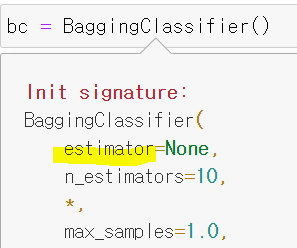 이렇게 되어있지만 의사결정 나무가 디폴트 값으로 된점을 더아래에서 확인할수있다.
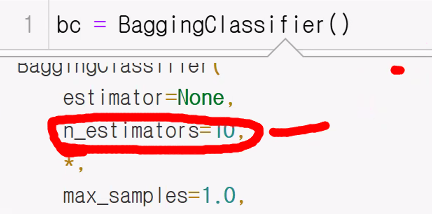
의사결정 나무로 분류할 데이터셋 개수 = 10개
<br> 의사결정나무도 10개인점.

- 항상 잊지말아야할 랜덤 스테이트
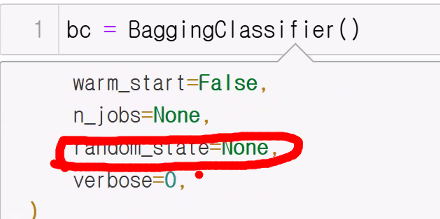

- cpu 코어를 동시 사용대수를 설정할수있음
- njobs=-1 이면 모든 코어사용
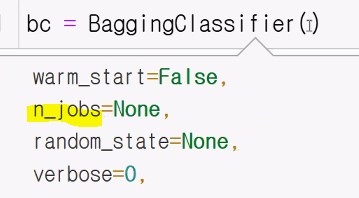

In [42]:
# 배깅'' 
est= DecisionTreeClassifier(max_depth=9, random_state=10)
                            # 성능제일 좋았던 파라미터를 넣어주기
                                    # 여기에도 대입
bc = BaggingClassifier(n_estimators=est, n_jobs=2, random_state=10)
bc.fit(X3_train, y3_train)
pred3 = bc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

InvalidParameterError: The 'n_estimators' parameter of BaggingClassifier must be an int in the range [1, inf). Got DecisionTreeClassifier(max_depth=9, random_state=10) instead.

# 부스팅 실습
에이다 사용

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
# 부스팅
                                          # 학습에 촘촘한 정도 (러닝레이트가 작을수록 꼼꼼)
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=10)
abc.fit(X3_train, y3_train)
pred3 = abc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8453746177370031
              precision    recall  f1-score   support

       False       0.86      0.95      0.90     11699
        True       0.79      0.53      0.64      3997

    accuracy                           0.85     15696
   macro avg       0.82      0.74      0.77     15696
weighted avg       0.84      0.85      0.83     15696



**다른 어셈블(그라디언트부스트) 해보기**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
# 그라디언트 부스트
                                          # 학습에 촘촘한 정도 (러닝레이트가 작을수록 꼼꼼)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=10)
gbc.fit(X3_train, y3_train)
pred3 = gbc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696



# XGBOOST
- 따로 설치해야함 (터미널)
- 부스팅에서 병렬식 처리가 안되던 문제를 해결
    - cpu -> gpu 
- 매우 빠른 처리속도
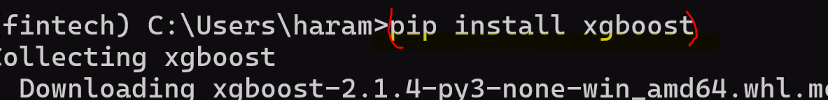
- 설치 https://xgboost.readthedocs.io/en/release_3.0.0/get_started.html
![image-2.png](attachment:image-2.png)

In [49]:
from xgboost import XGBRFClassifier

In [51]:
# xgb 
xgb = GradientBoostingClassifier(n_estimators=100, random_state=10)
xgb.fit(X3_train, y3_train)
pred3 = xgb.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696



In [53]:
# 반복문 돌려보기
for i in range(1,20):
    xgb = GradientBoostingClassifier(n_estimators=100, random_state=10)
    xgb.fit(X3_train, y3_train)
    pred3 = xgb.predict(X3_test)
    print(accuracy_score(y3_test,pred3))
    print(classification_report(y3_test,pred3))

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg       0.85      0.86      0.85     15696

0.8591997961264016
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11699
        True       0.78      0.62      0.69      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.78      0.80     15696
weighted avg     

In [59]:
%%time
xgb = GradientBoostingClassifier(n_estimators=1000, random_state=10)
xgb.fit(X3_train, y3_train)
pred3 = xgb.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8623216106014271
              precision    recall  f1-score   support

       False       0.89      0.93      0.91     11699
        True       0.76      0.67      0.71      3997

    accuracy                           0.86     15696
   macro avg       0.83      0.80      0.81     15696
weighted avg       0.86      0.86      0.86     15696

CPU times: total: 34.4 s
Wall time: 35.3 s


# LightGBM
- XGboost 보다 더 빠름
- 비대칭 트리로 분류함 ) max_depth가 -1 ) 최대라는뜻.
    - depth제한 없이 분석잘되는 방향으로 뻗침
    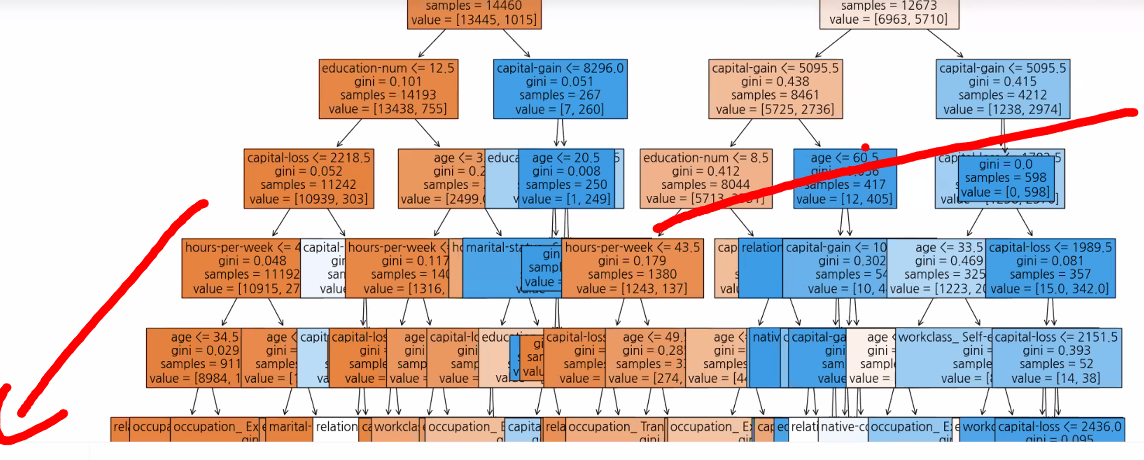
- 설치
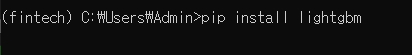

In [55]:
from lightgbm import LGBMClassifier

In [57]:
%%time
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=10, random_state=10)
lgbm.fit(X3_train, y3_train)
pred3 = lgbm.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5978, number of negative: 17566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.253908 -> initscore=-1.077879
[LightGBM] [Info] Start training from score -1.077879
0.8519367991845056
              precision    recall  f1-score   support

       False       0.89      0.91      0.90     11699
        True       0.73      0.67      0.70      3997

    accuracy                           0.85     15696
   macro avg       0.81      0.79      0.80     15696
weighted avg       0.85      0.85      0.85     15696

CPU times: total: 

# CatBoost
- 튜토리얼 제공: https://catboost.ai/docs/en/concepts/tutorials
- 

In [60]:
from catboost import CatBoostClassifier

In [62]:
%%time
cbc = CatBoostClassifier(n_estimators=1000 ,random_state=10)
cbc.fit(X3_train, y3_train)
pred3 = cbc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

Learning rate set to 0.039694
0:	learn: 0.6543189	total: 141ms	remaining: 2m 20s
1:	learn: 0.6230632	total: 150ms	remaining: 1m 14s
2:	learn: 0.5932435	total: 160ms	remaining: 53.2s
3:	learn: 0.5650058	total: 171ms	remaining: 42.6s
4:	learn: 0.5420107	total: 180ms	remaining: 35.9s
5:	learn: 0.5198550	total: 191ms	remaining: 31.6s
6:	learn: 0.4990511	total: 202ms	remaining: 28.6s
7:	learn: 0.4814588	total: 211ms	remaining: 26.2s
8:	learn: 0.4660605	total: 222ms	remaining: 24.4s
9:	learn: 0.4538850	total: 234ms	remaining: 23.2s
10:	learn: 0.4416266	total: 245ms	remaining: 22s
11:	learn: 0.4310563	total: 255ms	remaining: 21s
12:	learn: 0.4206623	total: 266ms	remaining: 20.2s
13:	learn: 0.4119377	total: 275ms	remaining: 19.4s
14:	learn: 0.4039812	total: 284ms	remaining: 18.7s
15:	learn: 0.3977329	total: 294ms	remaining: 18.1s
16:	learn: 0.3921903	total: 305ms	remaining: 17.7s
17:	learn: 0.3863481	total: 316ms	remaining: 17.3s
18:	learn: 0.3820768	total: 326ms	remaining: 16.8s
19:	learn: 0.

173:	learn: 0.2914614	total: 1.88s	remaining: 8.93s
174:	learn: 0.2913833	total: 1.89s	remaining: 8.91s
175:	learn: 0.2912140	total: 1.9s	remaining: 8.89s
176:	learn: 0.2911091	total: 1.91s	remaining: 8.88s
177:	learn: 0.2910478	total: 1.92s	remaining: 8.86s
178:	learn: 0.2909801	total: 1.93s	remaining: 8.83s
179:	learn: 0.2908525	total: 1.93s	remaining: 8.81s
180:	learn: 0.2907298	total: 1.94s	remaining: 8.79s
181:	learn: 0.2906823	total: 1.95s	remaining: 8.77s
182:	learn: 0.2906363	total: 1.96s	remaining: 8.75s
183:	learn: 0.2904738	total: 1.97s	remaining: 8.73s
184:	learn: 0.2904027	total: 1.98s	remaining: 8.71s
185:	learn: 0.2903552	total: 1.99s	remaining: 8.7s
186:	learn: 0.2903116	total: 1.99s	remaining: 8.67s
187:	learn: 0.2901561	total: 2s	remaining: 8.65s
188:	learn: 0.2901252	total: 2.01s	remaining: 8.63s
189:	learn: 0.2900541	total: 2.02s	remaining: 8.61s
190:	learn: 0.2899829	total: 2.03s	remaining: 8.58s
191:	learn: 0.2899086	total: 2.03s	remaining: 8.56s
192:	learn: 0.289

350:	learn: 0.2751527	total: 3.53s	remaining: 6.52s
351:	learn: 0.2751225	total: 3.54s	remaining: 6.51s
352:	learn: 0.2750507	total: 3.55s	remaining: 6.5s
353:	learn: 0.2749796	total: 3.56s	remaining: 6.49s
354:	learn: 0.2749265	total: 3.56s	remaining: 6.48s
355:	learn: 0.2748873	total: 3.58s	remaining: 6.47s
356:	learn: 0.2748326	total: 3.58s	remaining: 6.46s
357:	learn: 0.2747413	total: 3.6s	remaining: 6.45s
358:	learn: 0.2746901	total: 3.6s	remaining: 6.43s
359:	learn: 0.2746455	total: 3.61s	remaining: 6.42s
360:	learn: 0.2745844	total: 3.62s	remaining: 6.42s
361:	learn: 0.2743919	total: 3.63s	remaining: 6.4s
362:	learn: 0.2742227	total: 3.64s	remaining: 6.39s
363:	learn: 0.2741875	total: 3.65s	remaining: 6.38s
364:	learn: 0.2739746	total: 3.66s	remaining: 6.37s
365:	learn: 0.2737143	total: 3.67s	remaining: 6.36s
366:	learn: 0.2736627	total: 3.68s	remaining: 6.34s
367:	learn: 0.2736069	total: 3.69s	remaining: 6.34s
368:	learn: 0.2735642	total: 3.7s	remaining: 6.32s
369:	learn: 0.273

512:	learn: 0.2656736	total: 5.19s	remaining: 4.92s
513:	learn: 0.2656247	total: 5.2s	remaining: 4.92s
514:	learn: 0.2655401	total: 5.21s	remaining: 4.91s
515:	learn: 0.2655085	total: 5.22s	remaining: 4.89s
516:	learn: 0.2654272	total: 5.22s	remaining: 4.88s
517:	learn: 0.2654045	total: 5.23s	remaining: 4.87s
518:	learn: 0.2653335	total: 5.24s	remaining: 4.86s
519:	learn: 0.2652239	total: 5.25s	remaining: 4.84s
520:	learn: 0.2651829	total: 5.26s	remaining: 4.83s
521:	learn: 0.2650811	total: 5.26s	remaining: 4.82s
522:	learn: 0.2650478	total: 5.27s	remaining: 4.81s
523:	learn: 0.2650134	total: 5.28s	remaining: 4.8s
524:	learn: 0.2649998	total: 5.29s	remaining: 4.78s
525:	learn: 0.2649640	total: 5.3s	remaining: 4.77s
526:	learn: 0.2649316	total: 5.3s	remaining: 4.76s
527:	learn: 0.2648719	total: 5.31s	remaining: 4.75s
528:	learn: 0.2648315	total: 5.32s	remaining: 4.74s
529:	learn: 0.2647544	total: 5.33s	remaining: 4.73s
530:	learn: 0.2647258	total: 5.34s	remaining: 4.72s
531:	learn: 0.26

691:	learn: 0.2588679	total: 6.84s	remaining: 3.04s
692:	learn: 0.2588370	total: 6.85s	remaining: 3.04s
693:	learn: 0.2588024	total: 6.86s	remaining: 3.02s
694:	learn: 0.2587695	total: 6.87s	remaining: 3.02s
695:	learn: 0.2587386	total: 6.88s	remaining: 3.01s
696:	learn: 0.2587084	total: 6.89s	remaining: 2.99s
697:	learn: 0.2586602	total: 6.9s	remaining: 2.98s
698:	learn: 0.2586349	total: 6.91s	remaining: 2.97s
699:	learn: 0.2586115	total: 6.92s	remaining: 2.96s
700:	learn: 0.2585840	total: 6.92s	remaining: 2.95s
701:	learn: 0.2585447	total: 6.93s	remaining: 2.94s
702:	learn: 0.2585339	total: 6.94s	remaining: 2.93s
703:	learn: 0.2584970	total: 6.95s	remaining: 2.92s
704:	learn: 0.2584204	total: 6.96s	remaining: 2.91s
705:	learn: 0.2584094	total: 6.97s	remaining: 2.9s
706:	learn: 0.2583991	total: 6.98s	remaining: 2.89s
707:	learn: 0.2583701	total: 6.99s	remaining: 2.88s
708:	learn: 0.2583182	total: 7s	remaining: 2.87s
709:	learn: 0.2582676	total: 7.01s	remaining: 2.86s
710:	learn: 0.258

858:	learn: 0.2530567	total: 8.29s	remaining: 1.36s
859:	learn: 0.2530057	total: 8.31s	remaining: 1.35s
860:	learn: 0.2529788	total: 8.34s	remaining: 1.35s
861:	learn: 0.2529476	total: 8.35s	remaining: 1.34s
862:	learn: 0.2528903	total: 8.36s	remaining: 1.33s
863:	learn: 0.2528544	total: 8.37s	remaining: 1.32s
864:	learn: 0.2528383	total: 8.38s	remaining: 1.31s
865:	learn: 0.2527854	total: 8.39s	remaining: 1.3s
866:	learn: 0.2527357	total: 8.4s	remaining: 1.29s
867:	learn: 0.2527101	total: 8.41s	remaining: 1.28s
868:	learn: 0.2526916	total: 8.42s	remaining: 1.27s
869:	learn: 0.2526602	total: 8.43s	remaining: 1.26s
870:	learn: 0.2526336	total: 8.44s	remaining: 1.25s
871:	learn: 0.2525650	total: 8.45s	remaining: 1.24s
872:	learn: 0.2525285	total: 8.46s	remaining: 1.23s
873:	learn: 0.2525034	total: 8.47s	remaining: 1.22s
874:	learn: 0.2524719	total: 8.48s	remaining: 1.21s
875:	learn: 0.2524493	total: 8.49s	remaining: 1.2s
876:	learn: 0.2524063	total: 8.5s	remaining: 1.19s
877:	learn: 0.25

# 랜덤 배깅 (RandomForest)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
%%time
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=10 ,random_state=10)
rfc.fit(X3_train, y3_train)
pred3 = rfc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8298292558613659
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11699
        True       0.69      0.61      0.65      3997

    accuracy                           0.83     15696
   macro avg       0.78      0.76      0.77     15696
weighted avg       0.82      0.83      0.83     15696

CPU times: total: 37.5 s
Wall time: 6.06 s


In [65]:
# 반복문으로 max_depth
for i in range(1,21):
    rfc = RandomForestClassifier(max_depth=i,n_estimators=100, n_jobs=10 ,random_state=10)
    rfc.fit(X3_train, y3_train)
    pred3 = rfc.predict(X3_test)
    
    print(i)
    print(accuracy_score(y3_test,pred3))
    print(classification_report(y3_test,pred3))

1
0.7453491335372069
              precision    recall  f1-score   support

       False       0.75      1.00      0.85     11699
        True       0.00      0.00      0.00      3997

    accuracy                           0.75     15696
   macro avg       0.37      0.50      0.43     15696
weighted avg       0.56      0.75      0.64     15696



C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

2
0.7503185524974516
              precision    recall  f1-score   support

       False       0.75      1.00      0.86     11699
        True       1.00      0.02      0.04      3997

    accuracy                           0.75     15696
   macro avg       0.87      0.51      0.45     15696
weighted avg       0.81      0.75      0.65     15696

3
0.7762487257900101
              precision    recall  f1-score   support

       False       0.77      1.00      0.87     11699
        True       0.99      0.12      0.22      3997

    accuracy                           0.78     15696
   macro avg       0.88      0.56      0.54     15696
weighted avg       0.83      0.78      0.70     15696

4
0.7947884811416922
              precision    recall  f1-score   support

       False       0.78      1.00      0.88     11699
        True       0.98      0.20      0.33      3997

    accuracy                           0.79     15696
   macro avg       0.88      0.60      0.60     15696
weighted av

**precision만 중요한 경우라면 랜덤 포레스트가 쓰기좋은 모델이 되는것.**
<br>
여러개의 모델을 돌려봐야하는 이유
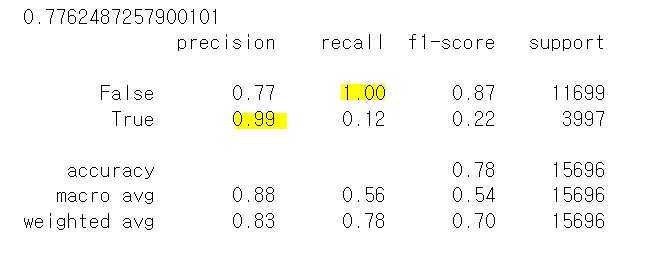
잘맞추는 모델이 데이터에 따라 다름

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier(random_strate=10)
rfc.fit(X_train,y_train)
pred=ftc.predict(X_test)
print(classification_report(y_test,))